<a href="https://colab.research.google.com/github/Sarath247662/Basis-of-Learning/blob/main/mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>exploring the dataset<h1>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)#as_frame because fetch_openML is giving back pandas dataframe.
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x,y = mnist["data"], mnist["target"]

In [ ]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
print(x[1].shape)

(784,)


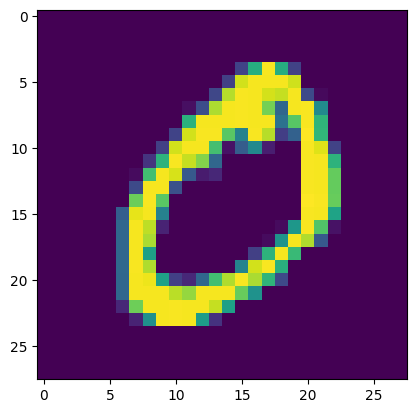

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

A = np.array(x[1].reshape(28,28))
plt.imshow(A, interpolation='none')
plt.show()


0


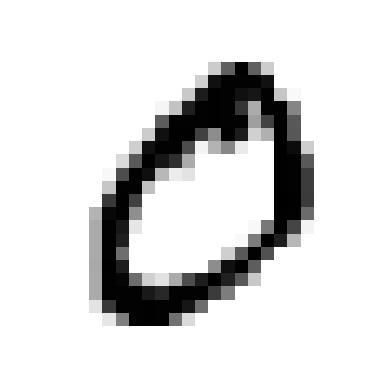

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
def num_img(a):
    plt.imshow(x[a].reshape(28,28),cmap=mpl.cm.binary)
    plt.axis("off")
    print(y[a])

num_img(1)


In [ ]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [ ]:
from sklearn.linear_model import SGDClassifier
classf = SGDClassifier(random_state = 42)
classf.fit(x_train ,y_train)

NameError: ignored

In [ ]:
classf.predict([x[2]])

array([4], dtype=uint8)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(classf,x_train,y_train,cv=3,scoring = "accuracy")

array([0.87495, 0.87085, 0.8777 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(classf,x_train,y_train_0,cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_predict)

array([[ 480, 5443,    0,    0,    0,    0,    0,    0,    0,    0],
       [6740,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [5890,   68,    0,    0,    0,    0,    0,    0,    0,    0],
       [6109,   22,    0,    0,    0,    0,    0,    0,    0,    0],
       [5818,   24,    0,    0,    0,    0,    0,    0,    0,    0],
       [5354,   67,    0,    0,    0,    0,    0,    0,    0,    0],
       [5871,   47,    0,    0,    0,    0,    0,    0,    0,    0],
       [6238,   27,    0,    0,    0,    0,    0,    0,    0,    0],
       [5828,   23,    0,    0,    0,    0,    0,    0,    0,    0],
       [5933,   16,    0,    0,    0,    0,    0,    0,    0,    0]])

<h1> using a simple neural network to train the entire dataset<h1>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train  = tf.keras.utils.normalize(x_train)
x_test  = tf.keras.utils.normalize(x_test)

In [ ]:
x_train[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

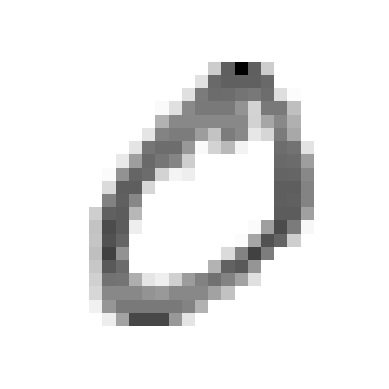

In [ ]:
plt.imshow(x_train[1].reshape(28,28),cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3068 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1366 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0974 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.021

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9775
0.07895708084106445
0.9775000214576721
